In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow
import keras

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.chdir("F:\\buffalo\\buffalo project\\fashion")

# importing data

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test= pd.read_csv("fashion-mnist_test.csv")

In [4]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


fashion_test.tail()

In [6]:
train=np.array(fashion_train,dtype='float32')
test=np.array(fashion_test,dtype='float32')

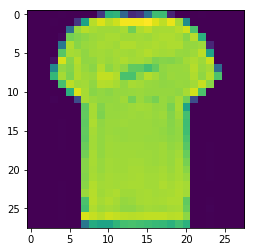

In [7]:
plt.imshow(train[10,1:].reshape(28,28))

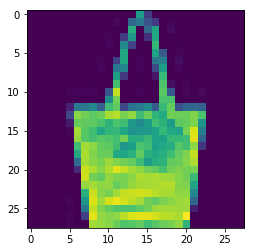

In [8]:
plt.imshow(train[9,1:].reshape(28,28))

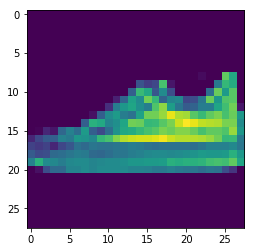

In [9]:
plt.imshow(train[21,1:].reshape(28,28))

9.0

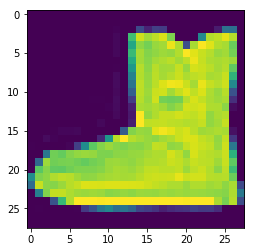

In [10]:
import random 
i=random.randint(1,60000)
plt.imshow(train[i,1:].reshape(28,28))
label=train[i,0]
label

# lables
0->tshirt,
1->trouser,
2->pullover,
3->dress,
4->coat,
5->sandal,
6->shirt,
7->sneaker,
8->bag,
9->ankle /boot

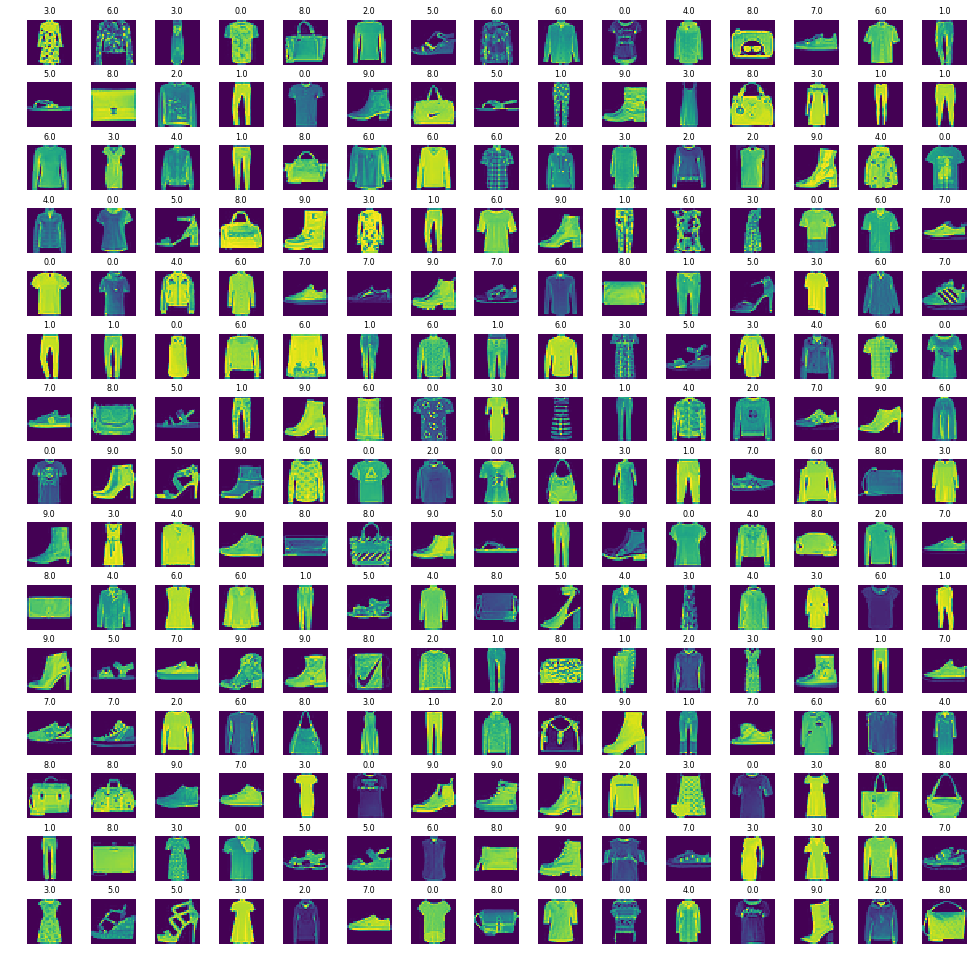

In [11]:
# grid size
h_grid=15
w_grid =15
fig,axes=plt.subplots(h_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
n_train=len(train)
for i in np.arange(0,h_grid*w_grid):
    index=np.random.randint(0,n_train)
    axes[i].imshow(train[index,1:].reshape((28,28)))
    axes[i].set_title(train[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Convolution Neural Network Model Building 

In [12]:
X_train =train[:,1:]/255
y_train =train[:,0]
X_test =test[:,1:]/255
y_test =test[:,0]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [14]:
X_train =X_train.reshape(X_train.shape[0],*(28,28,1))
X_valid =X_valid.reshape(X_valid.shape[0],*(28,28,1))
X_test =X_test.reshape(X_test.shape[0],*(28,28,1))


In [15]:
X_train.shape

(48000, 28, 28, 1)

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_valid.shape

(12000, 28, 28, 1)

# training the model using keras

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import TensorBoard
from keras.optimizers import Adam

#Build Network in squential -> convolution,max polling,droput,flattening,dense

In [40]:
cnn_model=Sequential()

In [41]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


# Max pooling

In [42]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening and Dense

In [43]:
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32,activation='relu'))


C:\Users\home\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [44]:
cnn_model.add(Dense(output_dim=10,activation="sigmoid"))

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


# Evaluation

In [46]:
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=.001),metrics=['accuracy'])

In [47]:
epochs=50

In [48]:
cnn_model.fit(X_train, 
              y_train, 
              batch_size=512, 
              epochs=50, 
              verbose=1, 
              callbacks=None,
              validation_data=(X_valid,y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 37s 765us/step - loss: 1.0532 - acc: 0.6302 - val_loss: 0.5047 - val_acc: 0.8191
Epoch 2/50
48000/48000 [==============================] - 35s 725us/step - loss: 0.4615 - acc: 0.8366 - val_loss: 0.4226 - val_acc: 0.8487
Epoch 3/50
48000/48000 [==============================] - 35s 738us/step - loss: 0.4034 - acc: 0.8575 - val_loss: 0.3842 - val_acc: 0.8673
Epoch 4/50
48000/48000 [==============================] - 37s 776us/step - loss: 0.3681 - acc: 0.8710 - val_loss: 0.3871 - val_acc: 0.8583
Epoch 5/50
48000/48000 [==============================] - 35s 737us/step - loss: 0.3482 - acc: 0.8772 - val_loss: 0.3488 - val_acc: 0.8782
Epoch 6/50
48000/48000 [==============================] - 37s 768us/step - loss: 0.3284 - acc: 0.8852 - val_loss: 0.3328 - val_acc: 0.8833
Epoch 7/50
48000/48000 [==============================] - 36s 758us/step - loss: 0.3148 - acc: 0.8896 - val_loss: 0.

# evaluating model

In [55]:
evaluation = cnn_model.evaluate(X_test,y_test)


10000/10000 [==============================] - 3s 250us/step


In [57]:
print("Test Accuracy",(evaluation))

Test Accuracy [0.2733676934301853, 0.9091]


In [60]:
pred_calss=cnn_model.predict_classes(X_test)
pred_calss

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

# making grid

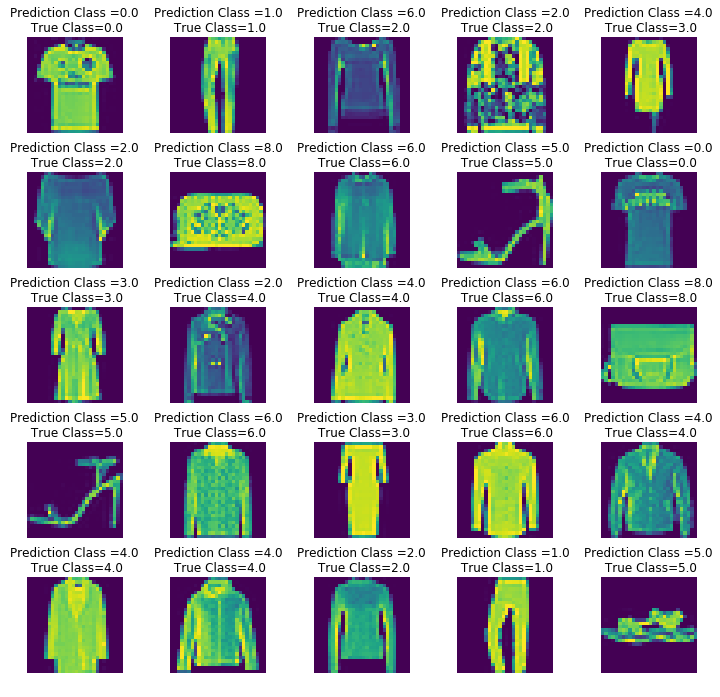

In [70]:
L=5
W=5
fig,axes =plt.subplots(L,W,figsize=(12,12))
axes= axes.ravel()

for i in np.arange(0,L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class ={:0.1f}\n True Class={:0.1f}".format(pred_calss[i],y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace=.5)

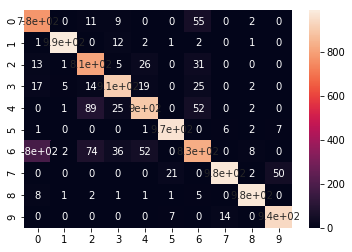

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_calss,y_test)
sns.heatmap(cm,annot=True)


In [80]:
from sklearn.metrics import classification_report
num_classes=10
target_names=["Class{}".format(i) for i in range (num_classes)]
print(classification_report(y_test,pred_calss,target_names=target_names))


             precision    recall  f1-score   support

     Class0       0.91      0.78      0.84      1000
     Class1       0.98      0.99      0.99      1000
     Class2       0.91      0.81      0.86      1000
     Class3       0.92      0.91      0.91      1000
     Class4       0.84      0.90      0.87      1000
     Class5       0.98      0.97      0.98      1000
     Class6       0.70      0.83      0.76      1000
     Class7       0.93      0.98      0.95      1000
     Class8       0.98      0.98      0.98      1000
     Class9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# lables
0->tshirt,
1->trouser,
2->pullover,
3->dress,
4->coat,
5->sandal,
6->shirt,
7->sneaker,
8->bag,
9->ankle /boot

# accuracy could be improved if we increase kernel and by drop out / regularisation